In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os.path as osp


In [2]:

def calc_ccr(ind_df, ood):

    FPR_list, CCR_list = [], []
    theta_list = np.unique(ind_df['confidence'].tolist() + ood.tolist())
    for theta in tqdm(theta_list):
        FPR = float((ood >= theta).sum() / len(ood))

        ind_subset = ind_df[ind_df['confidence'] > theta]
        CCR = float(ind_subset['is_correct'].sum() / len(ind_df))

        FPR_list.append(FPR)
        CCR_list.append(CCR)
#         print('[Theta FPR CCR]=[{} {} {}]'.format(theta, FPR, CCR))
    return FPR_list, CCR_list


def ccr_at_fpr(fpr_list, ccr_list, fpr_values_list=None):
    if fpr_values_list is None:
        fpr_values_list = [1e-4, 1e-3, 1e-2, 1e-1]

    for fpr_value in fpr_values_list:
        index = np.argmin(np.abs(np.array(fpr_list) - fpr_value))
        ccr_value = ccr_list[index]
        print('    CCR at FPR {}: {}'.format(fpr_value, ccr_value))


# Load Data

In [13]:
base_dir = osp.join('..', 'output', 'odin_soft_max_scores')

testset_list = ['Gaussian', 'Uniform', 'SVHN']
ind_list = ['cifar10', 'cifar100']
model_name_list = ['densenet']
fpr_values_list = [1e-4, 1e-3, 1e-2, 1e-1]

../output/odin_soft_max_scores/densenet10_odin_confidence_ood_Gaussian.npy



densenet cifar10 Uniform
    CCR at FPR 0.0001: 0.0
    CCR at FPR 0.001: 0.000999000999000999
    CCR at FPR 0.01: 0.006993006993006993
    CCR at FPR 0.1: 0.030969030969030968


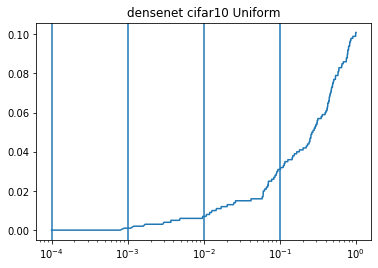

../output/odin_soft_max_scores/densenet10_odin_confidence_ood_SVHN.npy
../output/odin_soft_max_scores/densenet100_odin_confidence_ind_cifar100.npy
../output/odin_soft_max_scores/densenet100_odin_confidence_ind_cifar100.npy
../output/odin_soft_max_scores/densenet100_odin_confidence_ind_cifar100.npy


In [15]:
model_name = model_name_list[0]
ind_name = ind_list[0]
ood_name = testset_list[0]

for model_name in model_name_list:
    for ind_name in ind_list:
        for ood_name in testset_list:

            # IND
            file_name = osp.join(base_dir, "{}_odin_confidence_ind_{}.npy".format(
                model_name + ind_name.split('cifar')[-1], ind_name))
            if not osp.exists(file_name):
                print(file_name)
                continue
            ind_dict = np.load(file_name, allow_pickle=True).item()

            # OOD
            file_name = osp.join(base_dir, "{}_odin_confidence_ood_{}.npy".format(
                model_name + ind_name.split('cifar')[-1], ood_name))
            if not osp.exists(file_name):
                print(file_name)
                continue
            ood_dict = np.load(file_name, allow_pickle=True).item()

            ind_df = pd.DataFrame(
                {'confidence': ind_dict['confidence'], 'is_correct': ind_dict['is_correct']})
            ood_df = pd.DataFrame({'confidence': ood_dict['confidence']})[
                'confidence']

            # Analyze
            FPR_list, CCR_list = calc_ccr(ind_df, ood_df)
            experimnet_name = '{} [IND OOD]=[{} {}]'.format(
                model_name, ind_name, ood_name)
            print(experimnet_name)
            ccr_at_fpr(FPR_list, CCR_list, fpr_values_list)

            plt.title(experimnet_name)
            plt.plot(FPR_list, CCR_list)
            for value in fpr_values_list:
                plt.axvline(value)
            plt.xscale('log')
            plt.show()


In [9]:
ood_dict

{'confidence': [0.10005633533000946,
  0.10006246715784073,
  0.10005178302526474,
  0.10005360841751099,
  0.10005975514650345,
  0.10005307197570801,
  0.100058913230896,
  0.10005389153957367,
  0.10005947202444077,
  0.1000470370054245,
  0.10005345195531845,
  0.10005973279476166,
  0.10005883872509003,
  0.10006619989871979,
  0.10005557537078857,
  0.10004866123199463,
  0.1000603660941124,
  0.10006056725978851,
  0.10005490481853485,
  0.100055992603302,
  0.10006401687860489,
  0.1000552773475647,
  0.10005287081003189,
  0.10005572438240051,
  0.1000588983297348,
  0.1000511422753334,
  0.1000538170337677,
  0.10005602985620499,
  0.1000535860657692,
  0.10005588084459305,
  0.10005326569080353,
  0.10004641115665436,
  0.10006485134363174,
  0.10006070882081985,
  0.10006117075681686,
  0.10006397217512131,
  0.10005341470241547,
  0.10005523264408112,
  0.10005097091197968,
  0.1000538170337677,
  0.10005995631217957,
  0.1000581681728363,
  0.10006727278232574,
  0.100057